# Eye of ML
Object detection with video cam written in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from tqdm import tqdm

import torch
from torch import nn
from torch.backends import cudnn

# cudnn.fastest = True
cudnn.benchmark = True

In [3]:
# cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

In [4]:
if vc.isOpened():
    rval, frame = vc.read()
else:
    rval = False

In [5]:
vc.release()
# cv2.destroyWindow("preview")

See how our frame looks like. 

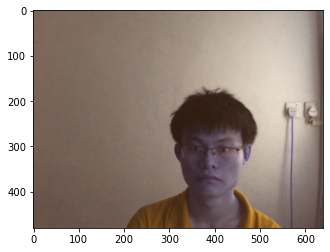

In [6]:
plt.imshow(frame)

In [21]:
??cv2.VideoCapture.read

Docstring:
read([, image]) -> retval, image
.   @brief Grabs, decodes and returns the next video frame.
.   
.       @param [out] image the video frame is returned here. If no frames has been grabbed the image will be empty.
.       @return `false` if no frames has been grabbed
.   
.       The method/function combines VideoCapture::grab() and VideoCapture::retrieve() in one call. This is the
.       most convenient method for reading video files or capturing data from decode and returns the just
.       grabbed frame. If no frames has been grabbed (camera has been disconnected, or there are no more
.       frames in video file), the method returns false and the function returns empty image (with %cv::Mat, test it with Mat::empty()).
.   
.       @note In @ref videoio_c "C API", functions cvRetrieveFrame() and cv.RetrieveFrame() return image stored inside the video
.       capturing structure. It is not allowed to modify or release the image! You can copy the frame using
.       cvClon

In [29]:
model = torch.hub.load("ultralytics/yolov5", "yolov5l6", pretrained=True)

Using cache found in C:\Users\Wabinab/.cache\torch\hub\ultralytics_yolov5_master
C:\Users\Wabinab\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [114]:
model = torch.load("models/efficientdet-d4.pth")

In [111]:
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

if vc.isOpened():
    rval, frame = vc.read()
else: 
    rval = False

for i in tqdm(range(1000)):
    results = model(frame)
    results.display(render=True)
    cv2.imshow("preview", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27:
        break
        
vc.release()
cv2.destroyWindow("preview")

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.70it/s]


In [60]:
%timeit results = model(frame)

18.3 ms ± 629 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%timeit np.array(results.imgs).squeeze()

41.4 µs ± 3.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
results = model(frame)

In [18]:
cv2.namedWindow("preview")
cv2.imshow("preview", results.imgs[0])

In [ ]:
while True:
    results = model(frame)
    cv2.imshow("image", frame)  # results.imgs[0]
    cv2.waitKey(20)

In [28]:
cv2.destroyWindow("image")

In [15]:
type(frame)

numpy.ndarray

In [16]:
type(results.imgs[0])

numpy.ndarray

In [69]:
np.count_nonzero(results.imgs[0] == frame)

14875

In [85]:
results.display()

In [31]:
results = model(frame)

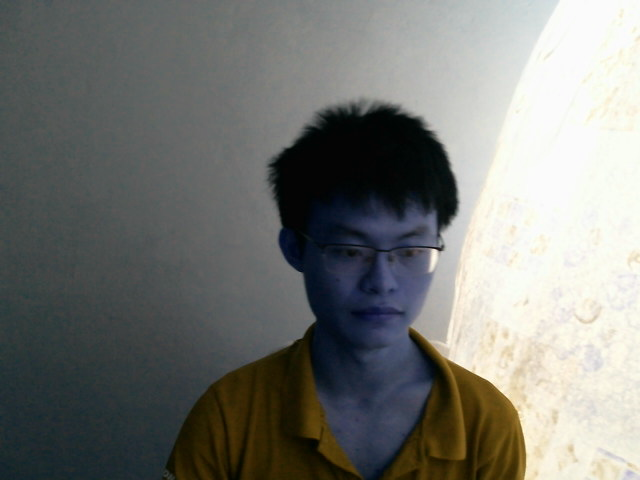

In [115]:
Image.fromarray(frame)

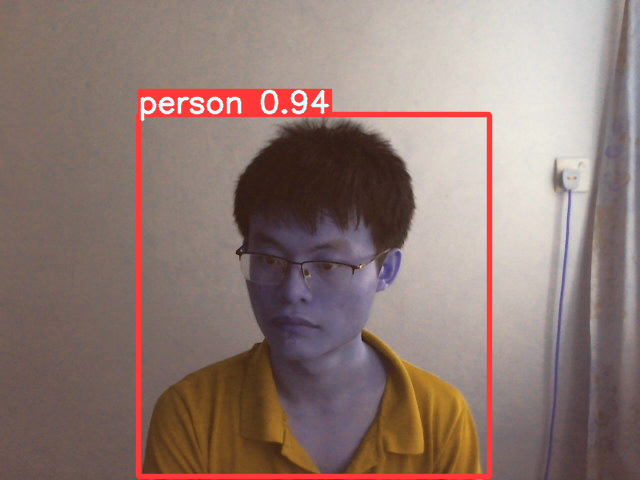

In [100]:
Image.fromarray(results.imgs[0])

In [99]:
results.display(render=True)

In [117]:
import tkinter as tk

In [118]:
window = tk.Tk()

In [120]:
??window.mainloop

Signature: window.mainloop(n=0)
Source:   
    def mainloop(self, n=0):
        """Call the mainloop of Tk."""
        self.tk.mainloop(n)
File:      c:\users\wabinab\appdata\local\programs\python\python38\lib\tkinter\__init__.py
Type:      method


In [11]:
from PIL import ImageTk, Image

In [129]:
frame = cv2.flip(frame, 1)
cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
img = Image.fromarray(cv2image)

# Tensorflow Experimentation

In [8]:
import tensorflow as tf
tf.__version__
gpu = tf.config.list_physical_devices()[1]
tf.config.experimental.set_memory_growth(gpu, True)

'2.4.2'

In [9]:
from myutils import *
ALL_MODELS, COCO17_HUMAN_POSE_KEYPOINTS, _, cat_index = initialize()

In [ ]:
with tf.device("/GPU:0"):
    model = hub.load(ALL_MODELS["EfficientDet D0 512x512"])

In [ ]:
embed = hub.KerasLayer(ALL_MODELS["EfficientDet D0 512x512"])

In [60]:
gpus = tf.config.list_physical_devices("GPU")
gpus

[]

In [11]:
%%timeit 
with tf.device("/GPU:0"):
    model(np.expand_dims(frame, 0))

292 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%timeit results = model(np.expand_dims(frame, 0))

461 ms ± 40.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
result = {key:value.numpy() for key, value in results.items()}

In [38]:
image_np_with_detections = frame.copy()

In [51]:
%%timeit

label_id_offset = 0
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in result:
      keypoints = result['detection_keypoints'][0]
      keypoint_scores = result['detection_keypoint_scores'][0]
viz_utils.visualize_boxes_and_labels_on_image_array(
      frame,
      result['detection_boxes'][0],
      (result['detection_classes'][0] + label_id_offset).astype(int),
      result['detection_scores'][0],
      cat_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=COCO17_HUMAN_POSE_KEYPOINTS)

6.94 ms ± 276 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
frame.shape

(480, 640, 3)

In [28]:
result["detection_classes"].shape

(1, 100)

In [18]:
np.expand_dims(frame, 0).shape

(1, 480, 640, 3)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(r"C:\Users\Wabinab\Downloads\Nouvea")

In [ ]:
import tensorflow_hub as hub
model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer(dtype=tf.uint8, input_shape=(1, None, None, 3)))
model.add(embed)
model.build(np.expand_dims(frame, 0).shape)

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [33]:
tflite_model = converter.convert()

ConverterError: <unknown>:0: error: loc(callsite(callsite("Postprocessor/BatchMultiClassNonMaxSuppression/MultiClassNonMaxSuppression/SortByField_1/Size@__inference___call___32344" at "StatefulPartitionedCall@__inference_signature_wrapper_35814") at "StatefulPartitionedCall")): 'tf.Size' op is neither a custom op nor a flex op
<unknown>:0: note: loc("StatefulPartitionedCall"): called from
<unknown>:0: error: failed while converting: 'main': Ops that can be supported by the flex runtime (enabled via setting the -emit-select-tf-ops flag):
	tf.Size {device = ""}


In [ ]:
with open("efficientdet_d0.tflite", "wb") as f:
    f.write(tflite_model)